In [ ]:
import os
import random
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')


Using cpu device


In [ ]:
def test_train_split(X, y, test_size):
    ## Splits the data set into training and test sets with test_size being the fraction of total data used for testing
    m, _ = np.shape(X)
    num_test = int(m * test_size)
    test_ids = random.sample(range(m), num_test)
    train_ids = [i for i in range(m) if i not in test_ids]
    X_train = X[train_ids, :]
    X_test = X[test_ids, :]
    y_train = y[train_ids]
    y_test = y[test_ids]

    return X_train, X_test, y_train, y_test

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            # nn.ReLU(),
            # nn.Linear(16, 1),
            # nn.ReLU(),
            # nn.Linear(64,64),
            # nn.ReLU(),
            # nn.Linear(64,64),
            # nn.ReLU(),
            # nn.Linear(64,1)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [ ]:
dataset = pd.read_csv('Concrete_Data(1).csv', delimiter = ',')
dataset = dataset.values
# dataset = dataset[1:,1:]
np.random.shuffle(dataset)
m, d = np.shape(dataset)
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)
X = dataset[:,:-1]
# X = np.c_[dataset[:, 1:], np.ones((np.size(dataset, 0), 1))]
# X = np.c_[dataset[:, :-1], np.ones((np.size(dataset, 0), 1))]
y = dataset[:, -1];

# y = dataset[:, -1]
# y = y.reshape((m, 1))
# y = y + 5 * np.random.randn(m,1)
# y = [2*(val == 'g') - 1 for val in range(len(y)) if val == 'g']
frac_test = 0.2
num_test = int(frac_test * m)
num_train = m - num_test
X_train, X_test, y_train, y_test = test_train_split(X, y , frac_test)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)
# X = torch.rand(1, 10, device=device)
# y_pred = model(X_test[0,:])
# print(f"Predicted values: {y_pred}")
#dataset

In [ ]:
monte = 20
Loss = nn.MSELoss()
algos = ['Adam','Adagrad','RMSprop','SGD']
epochs = 2 * 10 ** 2
tloss = {algo: np.zeros((epochs, 1)) for algo in algos}
eval_loss = {algo: np.zeros((epochs, 1)) for algo in algos}

# tacc = {algos[i]: np.zeros((epochs, 1)) for i in range(len(algos))}
# eval_acc = {algos[i]: np.zeros((epochs, 1)) for i in range(len(algos))}
y_pred_train_algo = []
y_pred_test_algo = []

In [ ]:
import numpy as np

class AdamAlgo()  :
    def __init__(self, eta = 0.01, betas = (0.9, 0.99), epsilon = 1e-8):
        # Initialize the first and 2nd order moments
        self.m_dtheta, self.v_dtheta = 0, 0
        self.epsilon = epsilon
        self.beta_1, self.beta_2 = betas[0], betas[1]
        self.eta = eta

    def update(self, t, theta, dtheta):
        # Update the moments
        self.m_dtheta = self.beta_1 * self.m_dtheta + (1 - self.beta_1) * dtheta
        self.v_dtheta = self.beta_2 * self.v_dtheta + (1 - self.beta_2) * (dtheta ** 2)

        # Moment corrections
        # print(self.beta_1 ** t)
        m_dtheta_corr = self.m_dtheta / (1 - self.beta_1 ** t)
        v_dtheta_corr = self.v_dtheta / (1 - self.beta_2 ** t)

        # Update the estimate
        theta = theta - self.eta * np.divide(m_dtheta_corr , np.sqrt(v_dtheta_corr + self.epsilon))

        return theta

class AdagradAlgo()  :
    def __init__(self, eta = 0.01, epsilon = 1e-8):
        # Initialize the 2nd order moment
        self.v_dtheta = 0
        self.epsilon = epsilon
        self.eta = eta

    def update(self, t, theta, dtheta):
        # Update the 2nd moment
        self.v_dtheta = self.v_dtheta + (dtheta ** 2)

        # Update the estimate
        theta = theta - self.eta * np.divide(dtheta , np.sqrt(self.v_dtheta) + self.epsilon)

        return theta

class RMSpropAlgo()  :
    def __init__(self, eta = 0.01, alpha = 0.99, epsilon = 1e-8):
        # Initialize the 2nd order moment
        self.v_dtheta = 0
        self.epsilon = epsilon
        self.eta = eta
        self.alpha = alpha

    def update(self, t, theta, dtheta):
        # Update the 2nd moment
        self.v_dtheta = self.alpha * self.v_dtheta + (1 - self.alpha) * (dtheta ** 2)

        # Update the estimate
        theta = theta - self.eta * np.divide(dtheta , np.sqrt(self.v_dtheta) + self.epsilon)

        return theta
class SGDAlgo():
    def __init__(self, eta = 0.01):
        self.eta = eta

    def update(self, t, theta, dtheta):
        # Update the estimate
        theta = theta - self.eta * dtheta

        return theta

In [ ]:
for algo in algos:
    print(algo)
    if algo == 'Adam':
      optimizer =  AdamAlgo(eta = 0.01, betas = (0.7, 0.999), epsilon = 1e-6)
    elif algo == 'Adagrad':
      optimizer = AdagradAlgo(eta = 0.01, epsilon = 1e-6)
    elif algo == 'RMSprop':
      optimizer == RMSpropAlgo(eta = 0.01, epsilon = 1e-6)
    elif algo == 'SGD':
      optimizer == SGDAlgo(eta = 2 * 0.01)
    for iter in range(monte):
        #print(iter)
        for t in range(epochs):
            # print(t)
            model.train()
            optimizer.zero_grad()
            batch_size = 500
            batch = random.sample(range(num_train), batch_size)
            # i_t = np.random.randint(0,len(y_train))
            #Forward pass
            y_pred_train = model(X_train[batch,:])
            model.eval()
            optimizer.zero_grad()
            y_pred_test = model(X_test)

            #Compute Loss
            train_loss = Loss(y_pred_train.squeeze(), y_train[batch])
            test_loss = Loss(y_pred_test.squeeze(), y_test)

            tloss[algo][t] += train_loss.item()
            eval_loss[algo][t] += test_loss.item()

            # Backward pass
            train_loss.backward()
            optimizer.step()

# print(tloss)
# print(eval_loss)
# identifiers = {algo: [] for algo in algos}
# colors = ['r','g','b','y','m','c','i','k']
colornames = ['r', 'g', 'b', 'm', 'y', 'k', 'c', 'indigo']
markers = ['_','.','+','o','s','d','v','^']
# colornames = list(colors.cnames.values())
# for i in range(len(algos)):
#     algo = algos[i]
#     identifiers[algo] = [colornames[2 * i + 1 ], colornames[2 * i ]]
i = 0
plt.figure()
for algo in algos:
    plt.semilogy(range(epochs), tloss[algo] / monte, marker = '_', color = colornames[2 * i], markersize = 5, linewidth = '2', label = algo + r'Training Loss')
    plt.semilogy(range(epochs), eval_loss[algo] / monte, marker = '_', color = colornames[2 * i + 1], linewidth = '2', markersize = 5, label = algo + r'Validation Loss')
    i += 1
plt.legend()
ax = plt.gca()

plt.grid()
plt.xlabel(r'Epochs')
plt.ylabel(r'Training and Validation Loss')



Adam


AttributeError: ignored

In [ ]:
c1=len(y_train)
s1=0

for i in range(0,c1):
    if(ypred[i][] == y_train[i]):
      s1+=1
result_01=(s1/c1*100)
print(result_01)

In [ ]:
import numpy as np

class AdamAlgo()  :
    def __init__(self, eta = 0.01, betas = (0.9, 0.99), epsilon = 1e-8):
        # Initialize the first and 2nd order moments
        self.m_dtheta, self.v_dtheta = 0, 0
        self.epsilon = epsilon
        self.beta_1, self.beta_2 = betas[0], betas[1]
        self.eta = eta

    def update(self, t, theta, dtheta):
        # Update the moments
        self.m_dtheta = self.beta_1 * self.m_dtheta + (1 - self.beta_1) * dtheta
        self.v_dtheta = self.beta_2 * self.v_dtheta + (1 - self.beta_2) * (dtheta ** 2)

        # Moment corrections
        # print(self.beta_1 ** t)
        m_dtheta_corr = self.m_dtheta / (1 - self.beta_1 ** t)
        v_dtheta_corr = self.v_dtheta / (1 - self.beta_2 ** t)

        # Update the estimate
        theta = theta - self.eta * np.divide(m_dtheta_corr , np.sqrt(v_dtheta_corr + self.epsilon))

        return theta

class AdagradAlgo()  :
    def __init__(self, eta = 0.01, epsilon = 1e-8):
        # Initialize the 2nd order moment
        self.v_dtheta = 0
        self.epsilon = epsilon
        self.eta = eta

    def update(self, t, theta, dtheta):
        # Update the 2nd moment
        self.v_dtheta = self.v_dtheta + (dtheta ** 2)

        # Update the estimate
        theta = theta - self.eta * np.divide(dtheta , np.sqrt(self.v_dtheta) + self.epsilon)

        return theta

class RMSpropAlgo()  :
    def __init__(self, eta = 0.01, alpha = 0.99, epsilon = 1e-8):
        # Initialize the 2nd order moment
        self.v_dtheta = 0
        self.epsilon = epsilon
        self.eta = eta
        self.alpha = alpha

    def update(self, t, theta, dtheta):
        # Update the 2nd moment
        self.v_dtheta = self.alpha * self.v_dtheta + (1 - self.alpha) * (dtheta ** 2)

        # Update the estimate
        theta = theta - self.eta * np.divide(dtheta , np.sqrt(self.v_dtheta) + self.epsilon)

        return theta
class SGDAlgo():
    def __init__(self, eta = 0.01):
        self.eta = eta

    def update(self, t, theta, dtheta):
        # Update the estimate
        theta = theta - self.eta * dtheta

        return theta

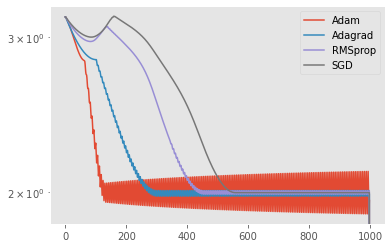

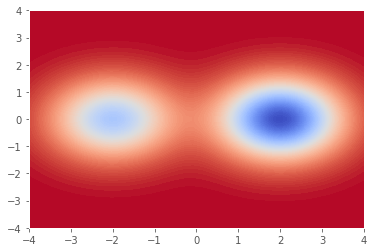

In [ ]:
## Test Adam, RMSprop, Adagrad and SGD for the  function f(x,y) = -2 * exp(-((x + 2)^2 + y^2)/2) - 3 * exp(-((x - 2)^2 + y^2)/2), which has local minimas at -2 and +2.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('ggplot')

h = 1e-7
wstar = np.array([0,0])
wstar = np.reshape(wstar, (2,1))
def loss_func(w):
    x, y = w
    ## Gaussian bumps
    loss = -2 * np.exp(-((x + 2) ** 2 + y ** 2) / 2) - 3 * np.exp(-((x - 2) ** 2 + y ** 2) / 2)
    ## Rastigin
    # loss = 20 + (x ** 2 - 10 * np.cos(2* np.pi * x)) + (y ** 2 - 10 * np.cos(2 * np.pi * y))

    return loss

def grad(w):
    x, y = w
    # g = lambda x : -(x ** 2 + 1) / 2 + np.log(np.exp(x) + 2 * np.exp(-x))
    # difg = lambda x : -x + 2 * (2 * np.exp(2 * x) - np.exp(-2 * x)) / (2 * np.exp(2 * x) + np.exp(-2 * x))

    # dw = np.array([loss_func(w) * difg(x), loss_func(w) * (-y)])
    dwx = (loss_func((x + h, y)) - loss_func((x,y))) / h
    dwy = (loss_func((x, y + h)) - loss_func((x,y))) / h
    dw = np.array([dwx, dwy])
    return dw

T = 1000

# Initialize w


algos = ['Adam','Adagrad','RMSprop','SGD']

wseq = {algo:np.zeros((2,T)) for algo in algos}
dwseq = {algo:np.zeros((2,T)) for algo in algos}
msdseq = {algo:np.zeros((1,T)) for algo in algos}

# adamseq = np.zeros((2,T))
# adagradseq = np.zeros((2,T))
# rmspropseq = np.zeros((2,T))
# sgdseq = np.zeros((2,T))
# w = 2 * np.random.randn(2,1)
w = np.reshape(np.array([1,-3]), (2,1))
# dw = grad(w)
for algo in algos:
    wseq[algo][:,[0]] = w
    # dwseq[algo][:,[0]] = dw


for t in range(0, T - 1):
    for algo in algos:
        if algo == 'Adam':
            optim =  AdamAlgo(eta = 0.01, betas = (0.7, 0.999), epsilon = 1e-6)
        elif algo == 'Adagrad':
            optim = AdagradAlgo(eta = 0.01, epsilon = 1e-6)
        elif algo == 'RMSprop':
            optim == RMSpropAlgo(eta = 0.01, epsilon = 1e-6)
        elif algo == 'SGD':
            optim == SGDAlgo(eta = 2 * 0.01)

        msdseq[algo][:,t] = np.linalg.norm(wseq[algo][:, [t]] - wstar)

        wseq[algo][:, [t + 1]] = optim.update(t + 1, wseq[algo][:, [t]], dwseq[algo][:, [t]])
        dwseq[algo][:, [t + 1]] = grad(wseq[algo][:, [t]])

plt.figure()
for algo in algos:
    plt.semilogy(range(T), msdseq[algo][:,:].T, label = algo)
plt.grid()
plt.legend()

xcoords = np.linspace(-4,4,50)
ycoords = np.linspace(-4,4,50)

X, Y = np.meshgrid(xcoords, ycoords)
Z = np.zeros(np.shape(X))
for i in range(len(xcoords)):
    for j in range(len(ycoords)):
        # x = xcoords[i]
        # y = ycoords[j]
        Z[i][j] = loss_func((X[i][j], Y[i][j]))

fig, axes = plt.subplots(nrows = 1, ncols = 1)
plt.contourf(X, Y, Z, 100, cmap = plt.cm.coolwarm)
# plt.plot(wseq['Adam'][0,:], wseq['Adam'][1,:])

axes.set_xlim(-4, 4)
axes.set_ylim (-4, 4)
# line, = ax.plot([], [], lw = 2)
xdata, ydata = {algo:[] for algo in algos}, {algo:[] for algo in algos}
c = ['r','g','b','k']
# def init():
#     line.set_data([],[])
#     return line,



In [ ]:
def pt_trace(t):
    # Traces the estimates generated by the algorithms in each iteration
    i = 0
    for algo in algos:
        x, y = wseq[algo][:,0]
        xdata[algo].append(x)
        # print(xdata[algo])
        ydata[algo].append(y)
        axes.plot(xdata[algo], ydata[algo], color = c[i])
        i += 1
    # return line,

# for algo in algos:
anim = FuncAnimation(fig, pt_trace, frames = 1500, interval = 200)
anim.save('trace_' + algo + '.htm', fps = 0.2, dpi = 200, writer = 'html')
# anim.save('trace_' + algo +'.gif',writer='html')
